In [1]:
import os,sys
from dotenv import load_dotenv, find_dotenv

load_dotenv(find_dotenv())

os.environ['PYTHONPATH']=os.environ.get('LIB')
if not os.environ.get('LIB') in sys.path: 
    sys.path.insert(0,os.environ.get('LIB'))

    
%load_ext autoreload
%autoreload 2
%pylab inline
%load_ext rpy2.ipython

import matplotlib.text as text
import pandas as pd
import numpy as np
import pylab as pl
import scipy as sp
import sys
import rpy2 
import os 
from matplotlib import gridspec
from scipy.interpolate import splev, splrep
import seaborn as sns
from scipy import stats
import rpy2.robjects.packages as rpackages
import seaborn as sns
from statsmodels import robust
from box import Box


pd.set_option('display.max_colwidth', 500)




Populating the interactive namespace from numpy and matplotlib


/ccte/server_data2/shah/anaconda3/envs/gecco-lsh/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:17: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import Index as PandasIndex


# Goal 

* Curve fitting 
* plotting  
* BMD calculation
* Hit calculation


In [3]:
# %%R

# library(tcpl)


In [9]:
from tcpl.fit.crvfit import *

CF0 = CurveFit()
CR = pd.DataFrame(dict(conc=[1,10,20,50,90,100], resp=[0.1,0.4,1,5,10,12]))
#CF0.fit(CR.conc,CR.resp,cutoff=1)

R = CF0(CR.conc,CR.resp,cutoff=1,summary=True,assay='myassay',
        fitmodels=['poly1','hill'])

#print("\n        - ".join(sorted(R.keys())))

#CF0.plot_fits(interp=True,best_only=True).keys()

In [10]:
R

{'model': 'hill',
 'aic': 14.92046977426179,
 'top': 14.399999999637723,
 'ac50': 63.38790417116329,
 'n_gt_cutoff': 3,
 'cutoff': 1,
 'fit_method': 'hill',
 'top_over_cutoff': 14.399999999637723,
 'rmse': 0.47415256591915217,
 'tp': 14.399999999637723,
 'p': 2.508599384852272,
 'ga': 63.38790417116329,
 'er': -1.195403823861224,
 'bmr': 1.349,
 'bmdl': 24.246635192039612,
 'bmdu': 26.744676209859346,
 'caikwt': 1.2261996919518673e-06,
 'mll': -3.4602348871308948,
 'hitcall': 0.9999987738003077,
 'ac5': 19.600103293558856,
 'ac10': 26.400845280139873,
 'ac20': 36.47606087350547,
 'acc': 22.527341493021268,
 'ac1sd': 22.527341493021268,
 'bmd': 25.651049593066876,
 'conc': '1|10|20|50|90|100',
 'resp': '0.1|0.4|1|5|10|12',
 'assay': 'myassay'}

In [11]:
F=CF0.calc_bmds(BMR=[1,2,3],model='exp5')
F

[{'bmr': 1, 'bmd': 1.7763568394002505e-12},
 {'bmr': 2, 'bmd': 1.7763568394002505e-12},
 {'bmr': 3, 'bmd': 1.7763568394002505e-12}]

In [12]:
F=CF0.calc_bmds(BMR=[1,2,3])
F

[{'bmr': 1, 'bmd': 22.527341493021265},
 {'bmr': 2, 'bmd': 30.629240824425715},
 {'bmr': 3, 'bmd': 37.229563526226315}]

In [13]:
CF0.hit()

In [14]:
CF0.get_summary()

{'model': 'hill',
 'aic': 14.92046977426179,
 'top': 14.399999999637723,
 'ac50': 63.38790417116329,
 'n_gt_cutoff': 3,
 'cutoff': 1.0,
 'fit_method': 'hill',
 'top_over_cutoff': 14.399999999637723,
 'rmse': 0.47415256591915217,
 'tp': 14.399999999637723,
 'p': 2.508599384852272,
 'ga': 63.38790417116329,
 'er': -1.195403823861224,
 'bmr': 1.349,
 'bmdl': 24.246635192039612,
 'bmdu': 26.744676209859346,
 'caikwt': 1.2261996919518673e-06,
 'mll': -3.4602348871308948,
 'hitcall': 0.9999987738003077,
 'ac5': 19.600103293558856,
 'ac10': 26.400845280139873,
 'ac20': 36.47606087350547,
 'acc': 22.527341493021268,
 'ac1sd': 22.527341493021268,
 'bmd': 25.651049593066876,
 'conc': '1|10|20|50|90|100',
 'resp': '0.1|0.4|1|5|10|12',
 'assay': 'myassay'}

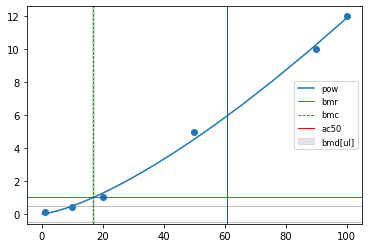

In [15]:
from tcpl.fit.crvfit import *

CF0 = CurveFit(hit_call=True)

CF0(CR.conc,CR.resp,cutoff=0.5,onesd=1,bmr_magic=1)
CF0.plot_fits(interp=True,best_only=True)

# Test new caller

In [16]:
from tcpl.fit.crvfit import *

CF0 = CurveFit()
CR = pd.DataFrame(dict(conc=[1,10,20,50,90,100], resp=[0.1,0.4,1,5,10,12]))
CF0(CR.conc,CR.resp,cutoff=1,summary=True,assay='test')
#CF0.plot_fits(interp=True,best_only=True)

{'model': 'pow',
 'aic': 7.168116478755518,
 'top': 11.884649721428119,
 'ac50': 60.766727795344096,
 'n_gt_cutoff': 3,
 'cutoff': 1,
 'fit_method': 'pow',
 'top_over_cutoff': 11.884649721428119,
 'rmse': 0.2542187583457304,
 'a': 0.019587404450125287,
 'p': 1.3915047476351516,
 'er': -1.5175935175697979,
 'bmr': 1.349,
 'bmdl': 20.543727757522806,
 'bmdu': 21.365730420986974,
 'caikwt': 2.5419066375465458e-08,
 'mll': -0.5840582393777591,
 'hitcall': 0.9999999745809336,
 'ac5': 11.61500397491877,
 'ac10': 19.114084954577233,
 'ac20': 31.45485308827463,
 'acc': 16.883590451472667,
 'ac1sd': 16.883590451472667,
 'bmd': 20.93617982463006,
 'conc': '1|10|20|50|90|100',
 'resp': '0.1|0.4|1|5|10|12',
 'assay': 'test'}

## Test CRCurveFromFit

In [17]:
F1 = {'model': 'pow',
  'aic': 1.9082474493393393,
  'top': -1.7795928131379009,
  'ac50': 34.46712876661727,
  'n_gt_cutoff': 2,
  'cutoff': 0.8069440527928959,
  'fit_method': 'pow',
  'top_over_cutoff': 2.2053484463744324,
  'rmse': 0.15783221822102303,
  'a': -0.08888660983387162,
  'p': 0.650742150406798,
  'er': -2.068976843584152,
  'bmr': 0.5442837636088083,
  'bmdl': 13.98612159279386,
  'bmdu': 19.0889078316089,
  'caikwt': 0.001103011809672186,
  'mll': 2.0458762753303303,
  'hitcall': 0.9986073263101948,
  'ac5': 1.001608805431864,
  'ac10': 2.905982718241271,
  'ac20': 8.431171444300361,
  'acc': 29.6603426637915,
  'ac1sd': 10.223068498548939,
  'bmd': 16.194649027022916,
  'conc': '1|4|11|33|100',
  'resp': '-0.380032784036184|-0.0335382429657858|-0.491021888161715|-0.83823034102675|-1.78599747836732',
  'assay': 'Aadac'}

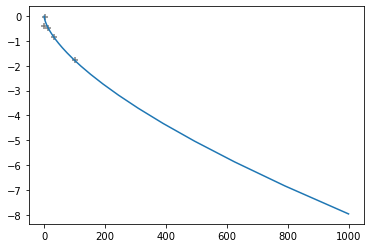

In [18]:
from tcpl.fit.crvfit import *
CCF = CRCurveFromFit()
CCF(F1,C=10**np.linspace(-2,3))
CCF.plot(data=True)

In [19]:
CCF.Fit['assay']

'Aadac'

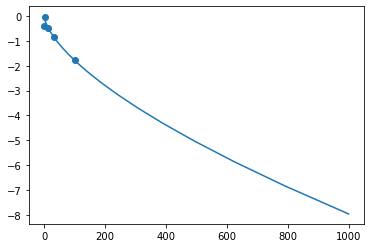

In [20]:
pl.plot(CCF.Cp,CCF.Rp)
pl.scatter(CCF.C,CCF.R)

In [21]:
CCF.C

0      1.0
1      4.0
2     11.0
3     33.0
4    100.0
dtype: float64